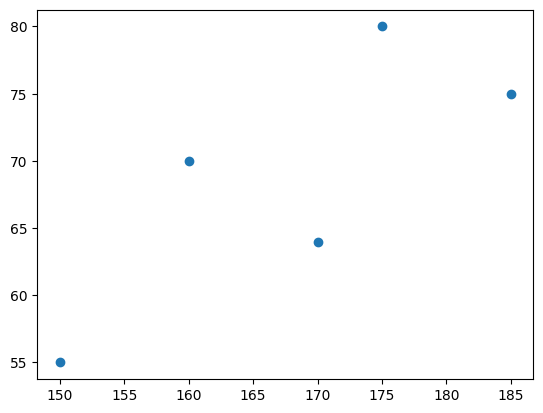

In [2]:
import torch
import matplotlib.pyplot as plt

x = torch.tensor([150, 160, 170, 175, 185.]) # 키
y = torch.tensor([55, 70, 64, 80, 75.]) # 몸무게
N = len(x)
plt.plot(x,y,'o')

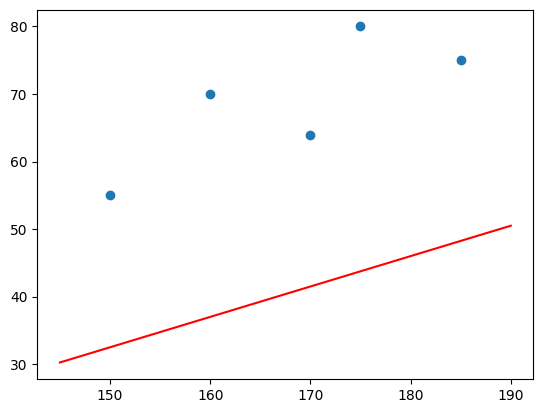

In [3]:
# 초깃값 설정
a = 0.45
b = -35
x_plot = torch.linspace(145,190,100)
y_plot = a* x_plot + b

plt.plot(x,y,'o')
plt.plot(x_plot, y_plot, 'r')

/usr/local/lib/python3.11/dist-packages/torch/functional.py:539: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /pytorch/aten/src/ATen/native/TensorShape.cpp:3637.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


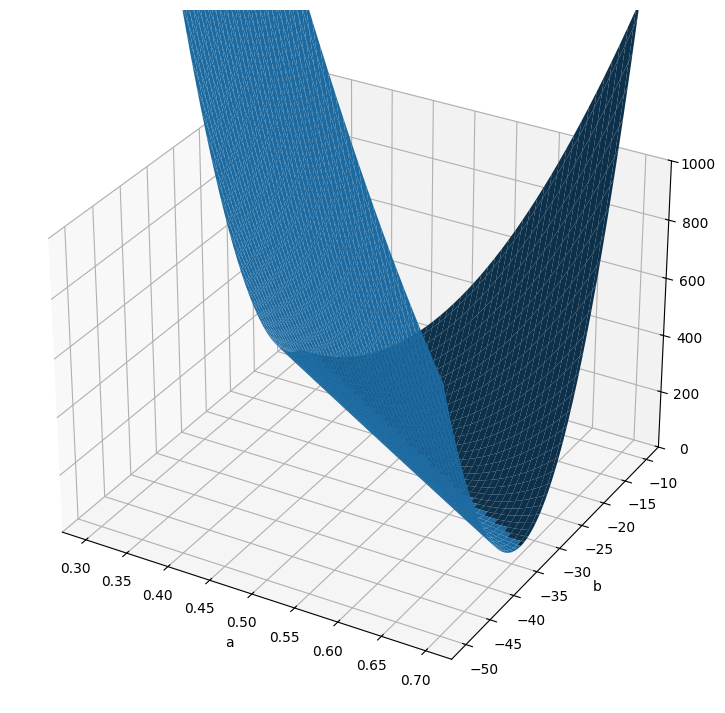

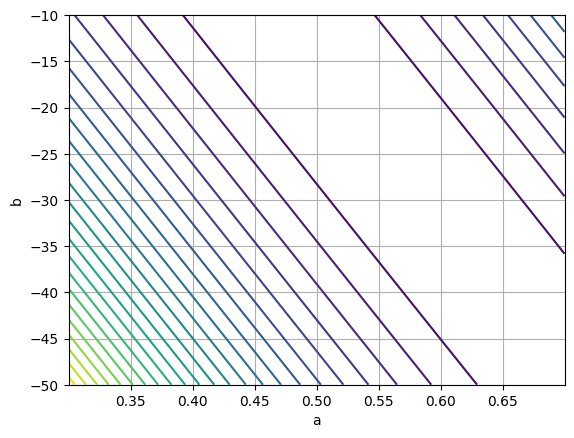

In [4]:
# a,b 를 바꿔가면서 Loss 값을 일일히 구해서 가장 작아지게 하는 a,b를 선정

a = 0.5 + torch.linspace(-0.2,0.2, 100)
b = -30 + torch.linspace(-20,20,100)

L=torch.zeros(len(b),len(a))
for i in range(len(b)):
  for j in range(len(a)):
    for n in range(N):
      L[i,j] = L[i,j] + (y[n] - (a[j]*x[n]+b[i]))**2
L = L/N

plt.figure(figsize=[10, 9])
ax = plt.axes(projection="3d")
A, B = torch.meshgrid(a,b)
ax.plot_surface(A,B,L);
ax.set_xlabel('a'); ax.set_ylabel('b')
ax.set_zlim([0,1000])

plt.figure()
plt.contour(a,b,L,30)
plt.xlabel('a'); plt.ylabel('b'); plt.grid()

In [6]:
print(torch.min(L))
a_opt = A[L==torch.min(L)]
b_opt = B[L==torch.min(L)]
print(f"optimal a = {a_opt}")
print(f"optimal b = {b_opt}")

tensor(29.0315)
optimal a = tensor([0.5424])
optimal b = tensor([-23.7374])


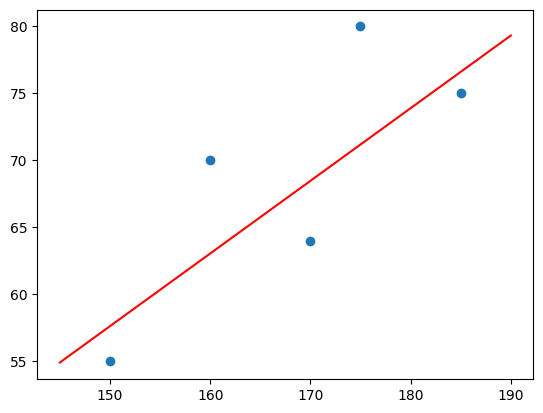

In [7]:
x_plot=torch.linspace(145,190,100)
y_plot=a_opt*x_plot+b_opt
plt.plot(x,y,'o')
plt.plot(x_plot,y_plot,'r')

Epoch: 1, train loss: 826.2250
weight: 0.4500, Bias: -34.9998


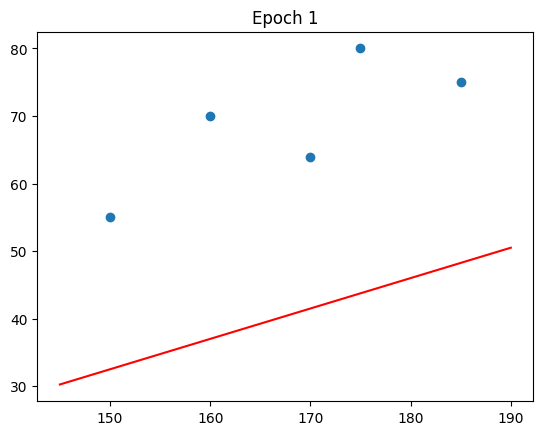

Epoch: 2, train loss: 826.2155
weight: 0.4500, Bias: -34.9997


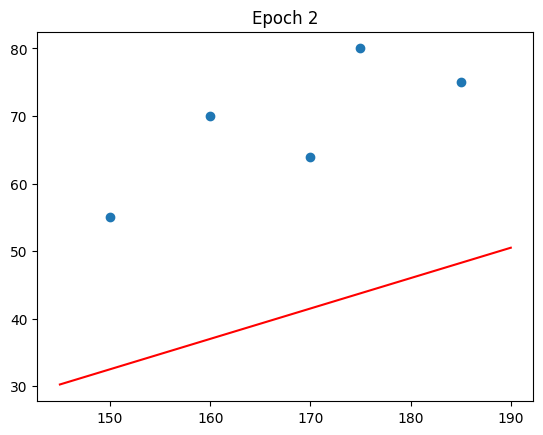

Epoch: 3, train loss: 826.2061
weight: 0.4500, Bias: -34.9995


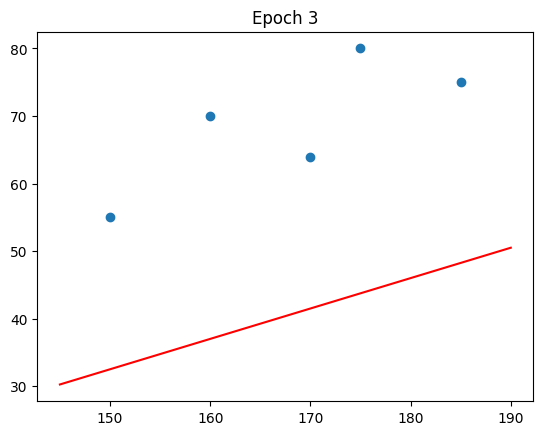

Epoch: 4, train loss: 826.1966
weight: 0.4500, Bias: -34.9993


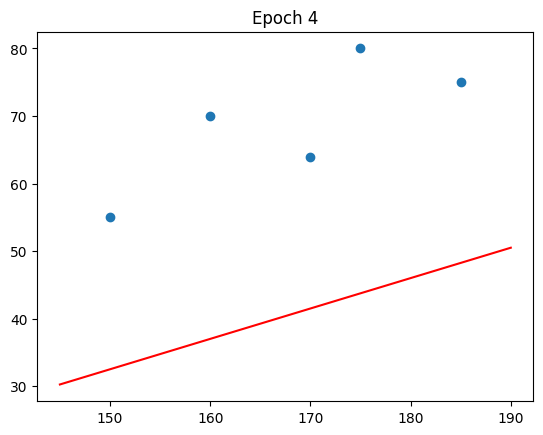

Epoch: 5, train loss: 826.1871
weight: 0.4500, Bias: -34.9992


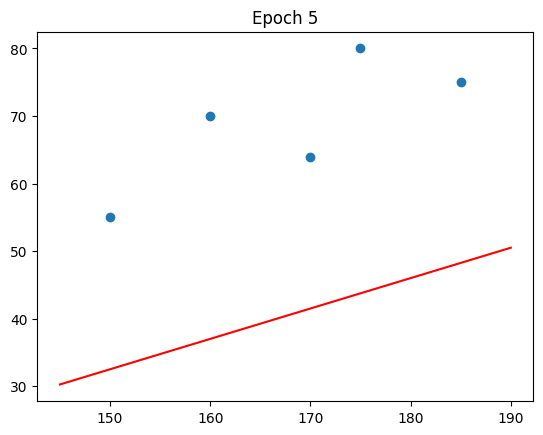

Epoch: 6, train loss: 826.1777
weight: 0.4500, Bias: -34.9990


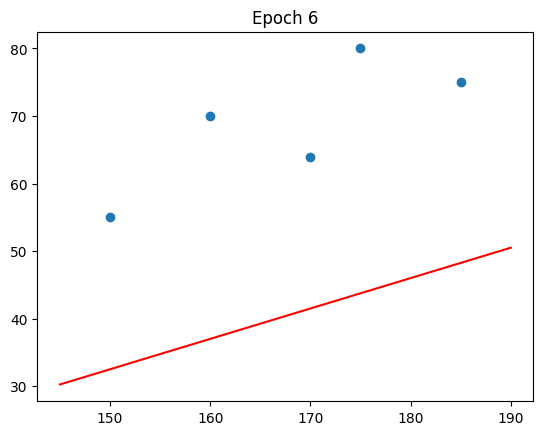

Epoch: 7, train loss: 826.1683
weight: 0.4500, Bias: -34.9988


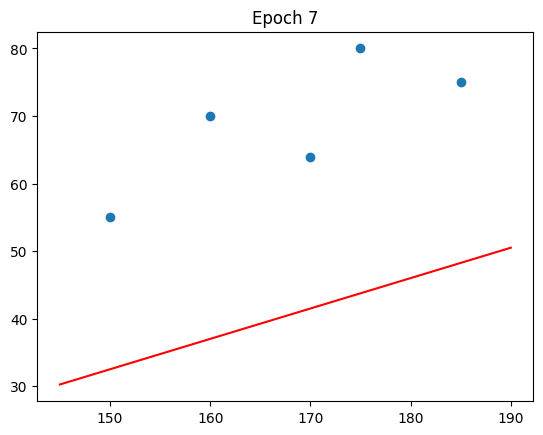

Epoch: 8, train loss: 826.1588
weight: 0.4500, Bias: -34.9987


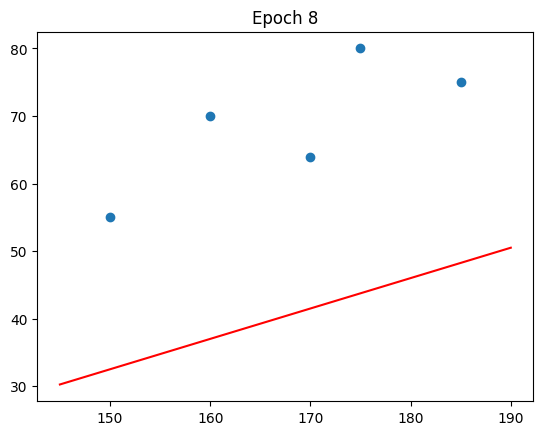

Epoch: 9, train loss: 826.1493
weight: 0.4500, Bias: -34.9985


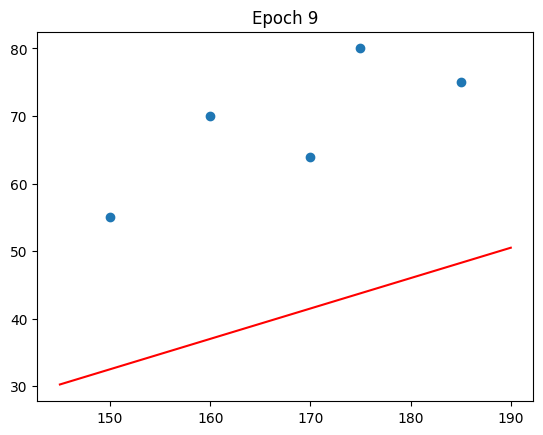

Epoch: 10, train loss: 826.1398
weight: 0.4500, Bias: -34.9983


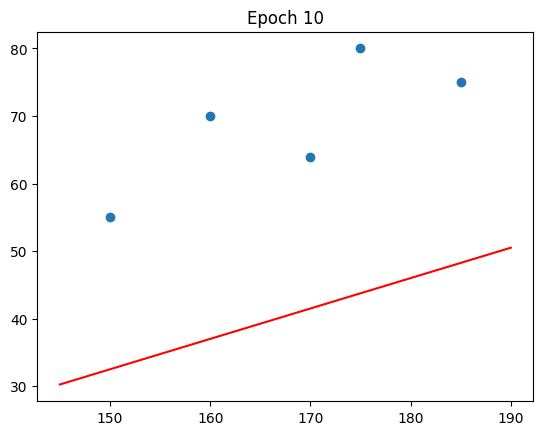

Epoch: 11, train loss: 826.1304
weight: 0.4500, Bias: -34.9982


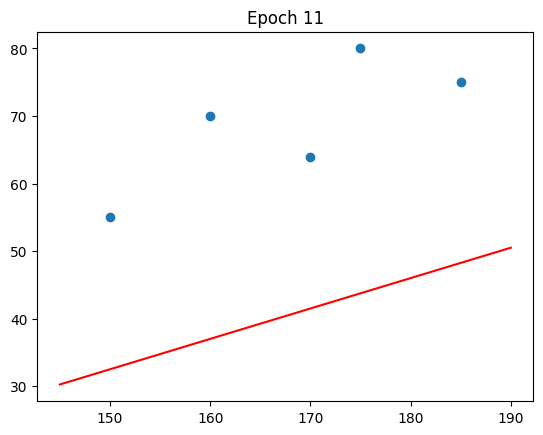

Epoch: 12, train loss: 826.1209
weight: 0.4500, Bias: -34.9980


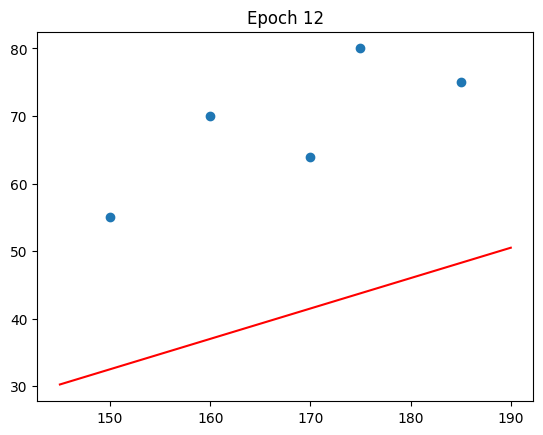

Epoch: 13, train loss: 826.1115
weight: 0.4500, Bias: -34.9978


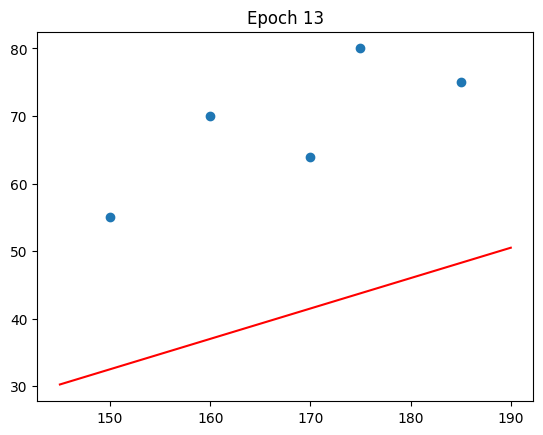

Epoch: 14, train loss: 826.1019
weight: 0.4500, Bias: -34.9977


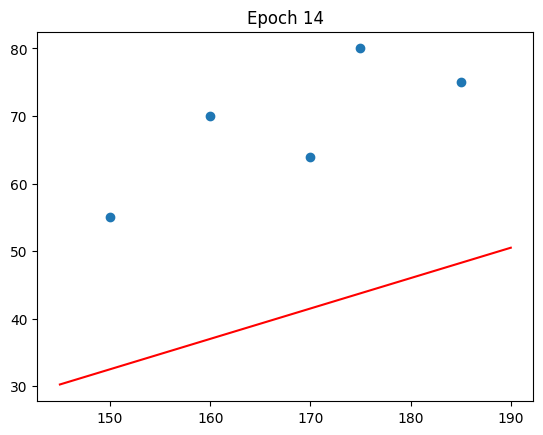

Epoch: 15, train loss: 826.0925
weight: 0.4500, Bias: -34.9975


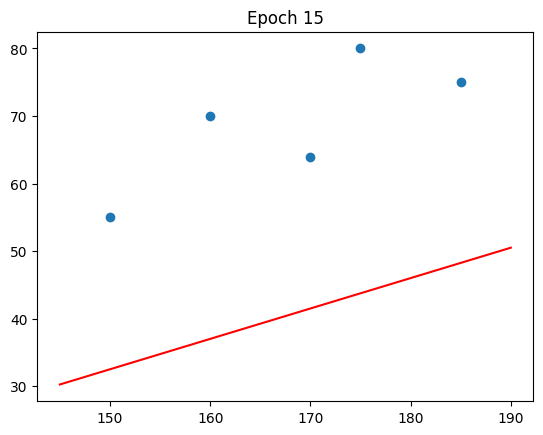

Epoch: 16, train loss: 826.0830
weight: 0.4500, Bias: -34.9973


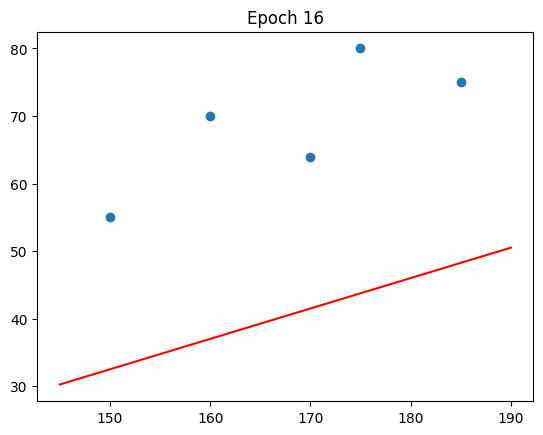

Epoch: 17, train loss: 826.0735
weight: 0.4500, Bias: -34.9971


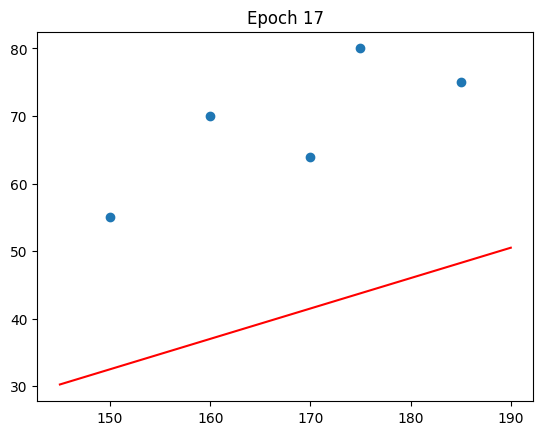

Epoch: 18, train loss: 826.0641
weight: 0.4500, Bias: -34.9970


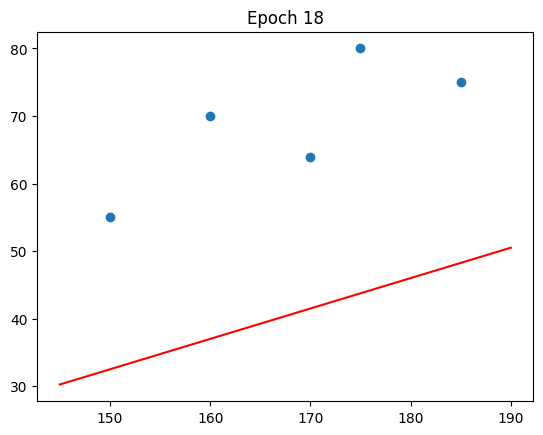

Epoch: 19, train loss: 826.0547
weight: 0.4500, Bias: -34.9968


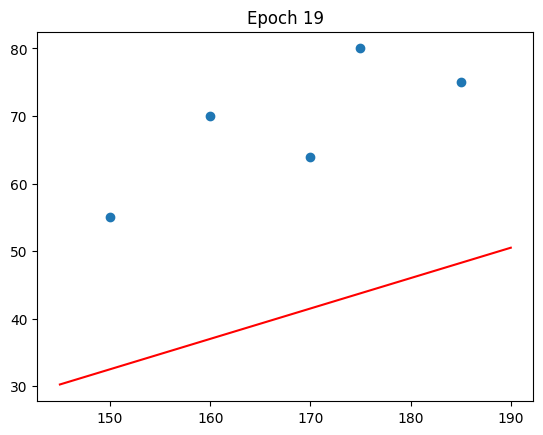

Epoch: 20, train loss: 826.0451
weight: 0.4500, Bias: -34.9966


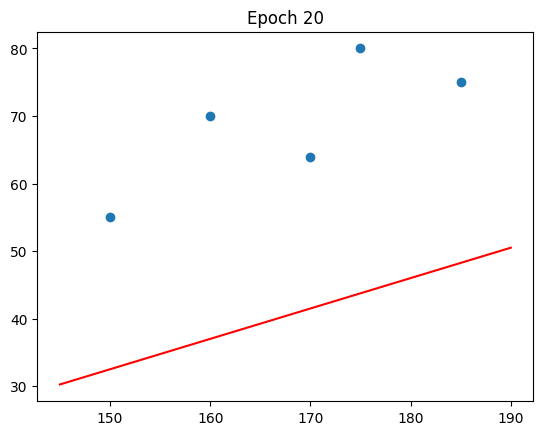

In [10]:
# 모델 파라미터 초기화
a = torch.tensor([0.45], requires_grad=True)
b = torch.tensor([-35.], requires_grad=True)

# 하이퍼파라미터 설정
LR = 3e-6
EPOCH = 20

loss_history = []

for ep in range(EPOCH):
  # inference
  y_hat = a * x + b
  # loss
  loss = 0
  for n in range(N):
    loss += (y[n] - y_hat[n])**2
  loss = loss/N # MSE
  # update
  loss.backward() # backpropagation
  with torch.no_grad():
    a -= LR * torch.tensor([0.]) # weight update
    b -= LR * b.grad #weight update
  a.grad = torch.tensor([0.]) # gradient 초기화
  b.grad = torch.tensor([0.]) # gradient 초기화
  # print loss
  loss_history += [loss.item()]
  print(f"Epoch: {ep+1}, train loss: {loss.item():.4f}")
  # print weight and bias
  print(f"weight: {a.item():.4f}, Bias: {b.item():.4f}")
  # plot graph
  x_plot = torch.linspace(145, 190, 100)
  y_plot = a.detach() * x_plot + b.detach()
  plt.figure()
  plt.plot(x, y, 'o')
  plt.plot(x_plot, y_plot, 'r')
  plt.title(f"Epoch {ep+1}")
  plt.show()

In [12]:
# .grad 초기화 필요한 이유 실험
z = torch.tensor([1.], requires_grad=True)
for _ in range(2):
  loss = z**2
  loss.backward()
  print(z.grad)
  z.grad = torch.tensor([0.])
  print(z.grad)

tensor([2.])
tensor([0.])
tensor([2.])
tensor([0.])


Text(0.5, 1.0, 'Training Loss')

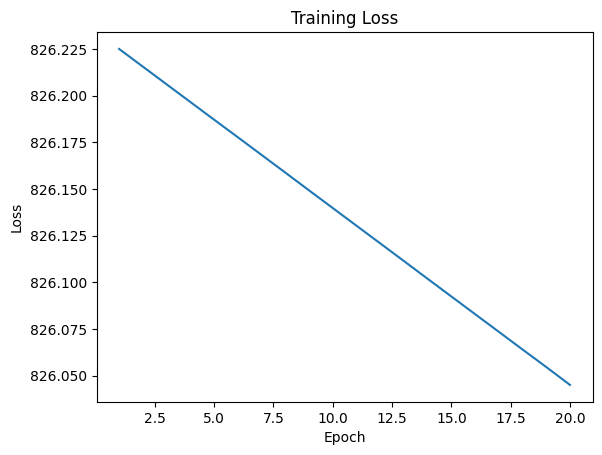

In [13]:
# plot loss_history
plt.plot(range(1,EPOCH+1), loss_history)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss")

Epoch: 1, train loss: 900.5650
weight: 0.4780, Bias:-34.9998


/usr/local/lib/python3.11/dist-packages/torch/nn/modules/loss.py:610: UserWarning: Using a target size (torch.Size([5])) that is different to the input size (torch.Size([5, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


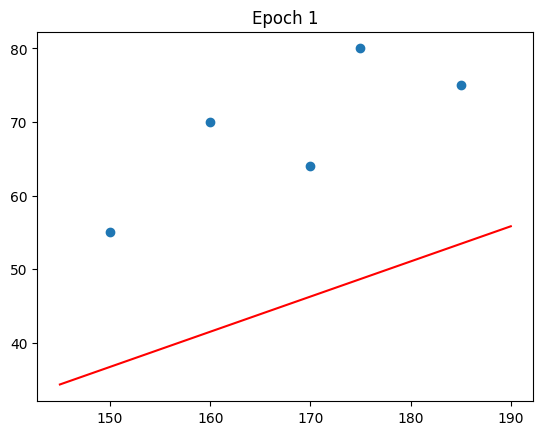

Epoch: 2, train loss: 660.9294
weight: 0.5013, Bias:-34.9997


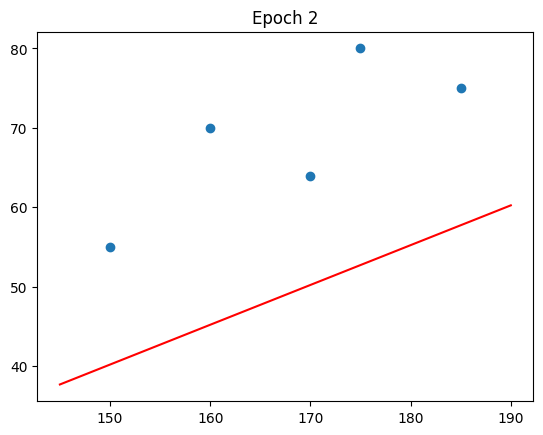

Epoch: 3, train loss: 495.9343
weight: 0.5206, Bias:-34.9996


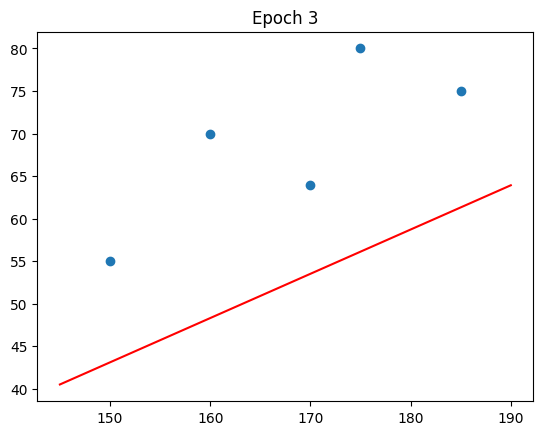

Epoch: 4, train loss: 382.3307
weight: 0.5366, Bias:-34.9995


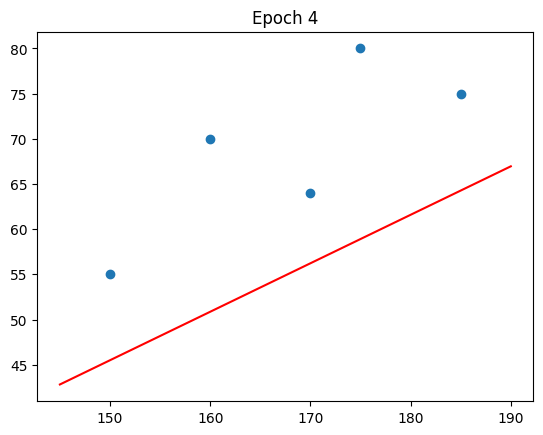

Epoch: 5, train loss: 304.1121
weight: 0.5499, Bias:-34.9994


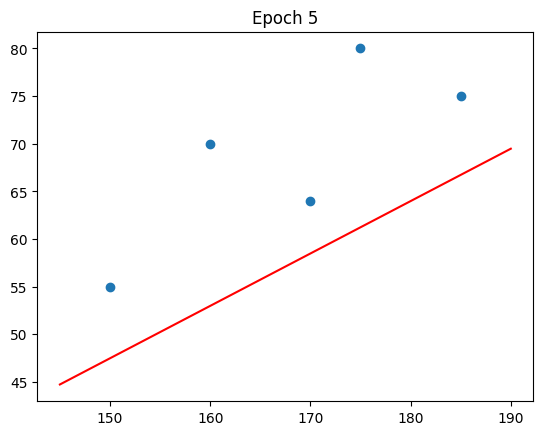

Epoch: 6, train loss: 250.2566
weight: 0.5609, Bias:-34.9993


/usr/local/lib/python3.11/dist-packages/torch/nn/modules/loss.py:610: UserWarning: Using a target size (torch.Size([5])) that is different to the input size (torch.Size([5, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


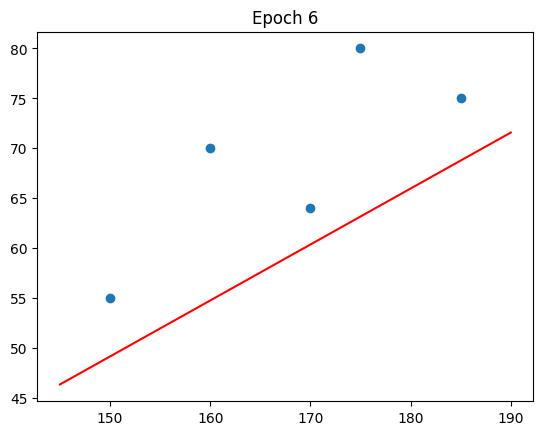

Epoch: 7, train loss: 213.1756
weight: 0.5701, Bias:-34.9993


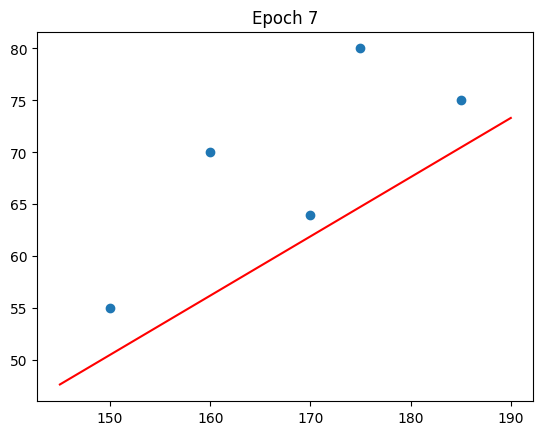

Epoch: 8, train loss: 187.6445
weight: 0.5777, Bias:-34.9992


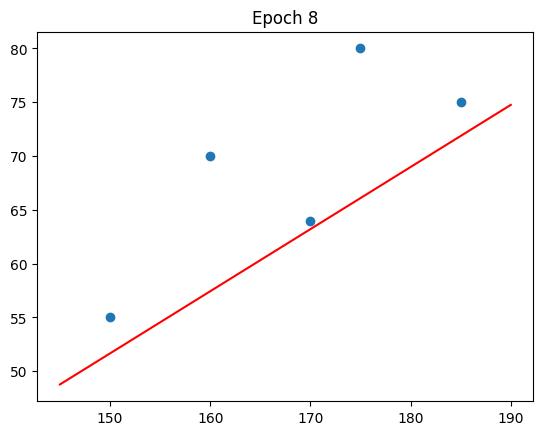

Epoch: 9, train loss: 170.0657
weight: 0.5840, Bias:-34.9992


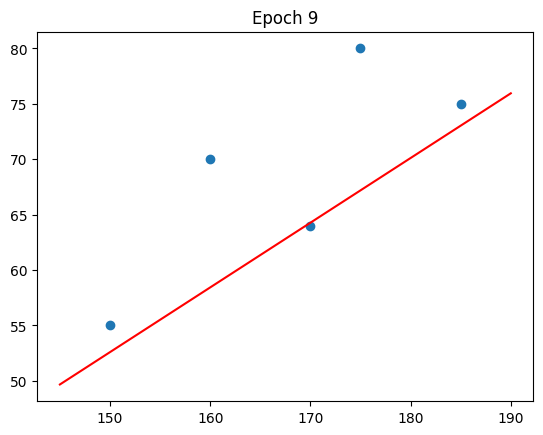

Epoch: 10, train loss: 157.9622
weight: 0.5892, Bias:-34.9991


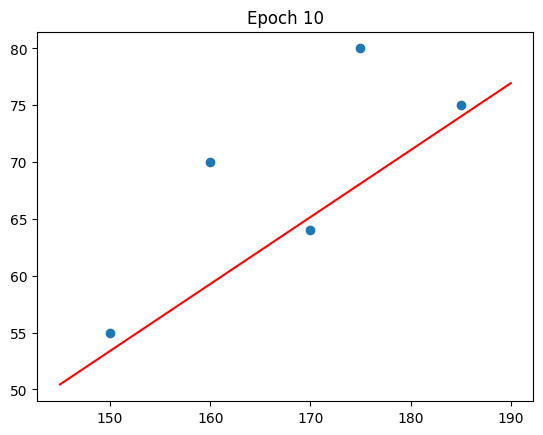

Epoch: 11, train loss: 149.6288
weight: 0.5935, Bias:-34.9991


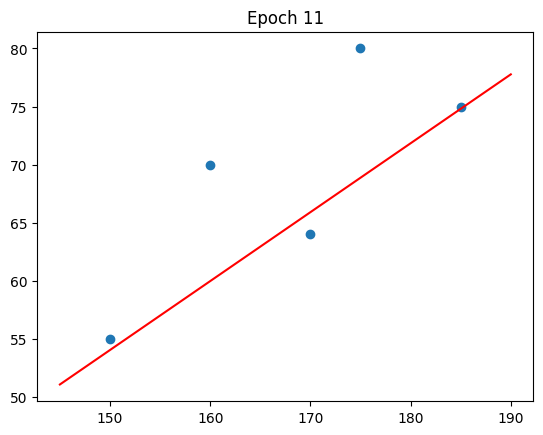

Epoch: 12, train loss: 143.8909
weight: 0.5971, Bias:-34.9991


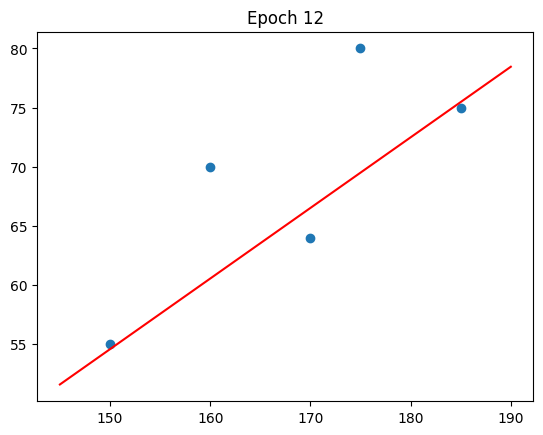

Epoch: 13, train loss: 139.9402
weight: 0.6001, Bias:-34.9991


/usr/local/lib/python3.11/dist-packages/torch/nn/modules/loss.py:610: UserWarning: Using a target size (torch.Size([5])) that is different to the input size (torch.Size([5, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


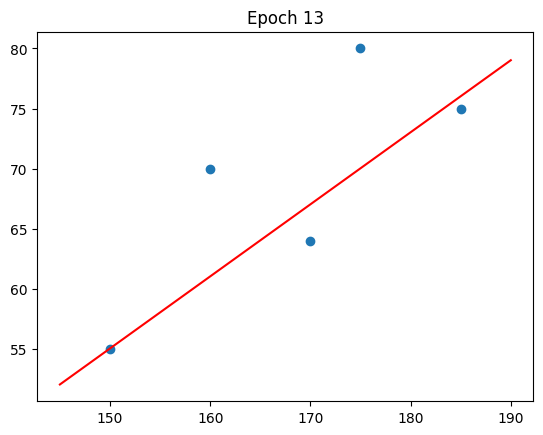

Epoch: 14, train loss: 137.2202
weight: 0.6026, Bias:-34.9991


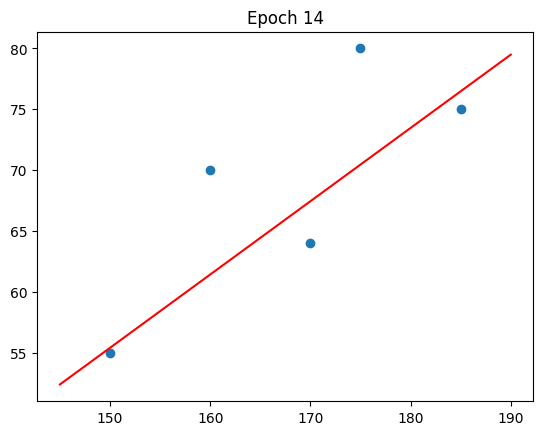

Epoch: 15, train loss: 135.3472
weight: 0.6046, Bias:-34.9990


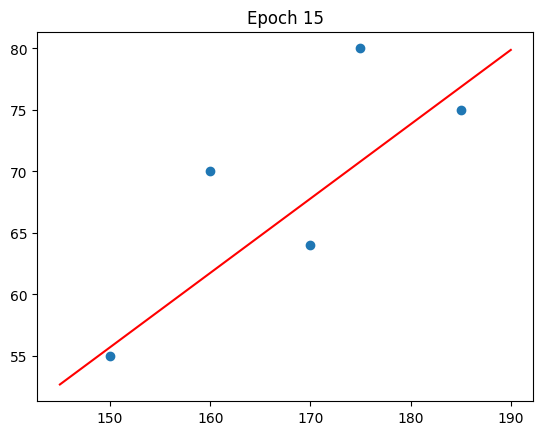

Epoch: 16, train loss: 134.0578
weight: 0.6064, Bias:-34.9990


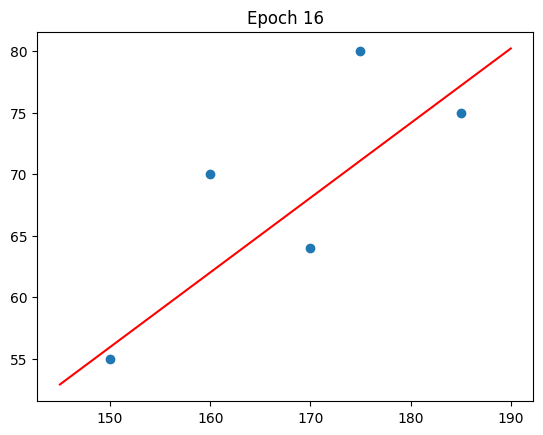

Epoch: 17, train loss: 133.1698
weight: 0.6078, Bias:-34.9990


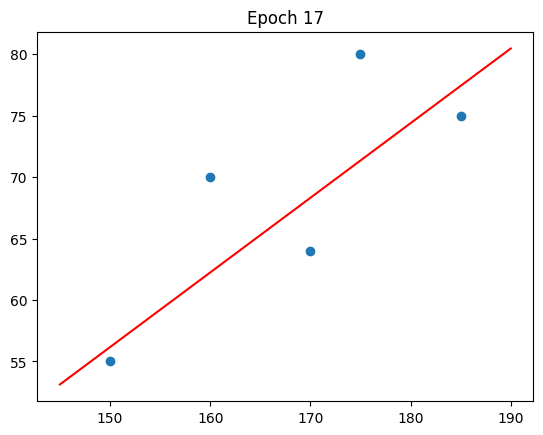

Epoch: 18, train loss: 132.5586
weight: 0.6089, Bias:-34.9990


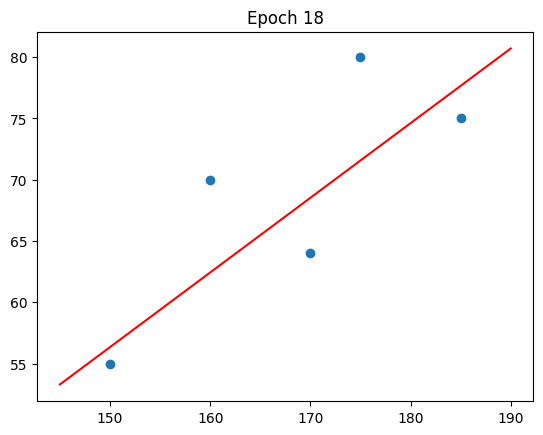

Epoch: 19, train loss: 132.1376
weight: 0.6099, Bias:-34.9990


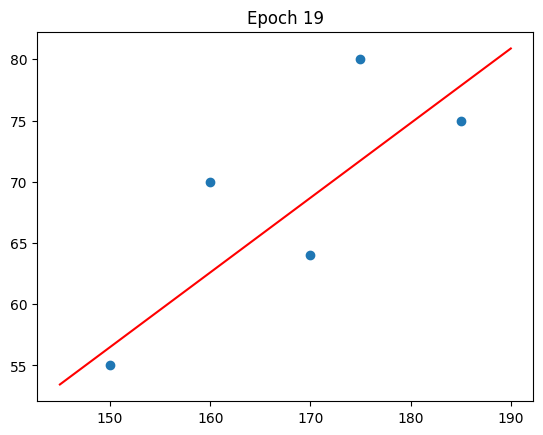

Epoch: 20, train loss: 131.8478
weight: 0.6107, Bias:-34.9990


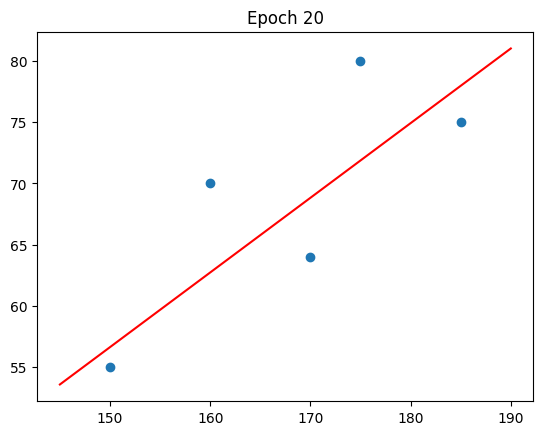

In [14]:
from torch import nn, optim

x=x.reshape(-1,1) # 개체 형태로 바꿔줌
model = nn.Linear(1,1)
model.weight.data = torch.tensor([[0.45]])
model.bias.data = torch.tensor([-35.])

LR = 3e-6
EPOCH = 20
optimizer = optim.SGD(model.parameters(), lr=LR)
criterion = nn.MSELoss()

loss_history = []

for ep in range(EPOCH):
  # inference
  y_hat = model(x)
  # loss
  loss = criterion(y_hat,y)
  # update
  optimizer.zero_grad() # gradient 누적을 막기 위한 초기화
  loss.backward() # backpropagation
  optimizer.step()
  # print loss
  loss_history += [loss.item()]
  print(f"Epoch: {ep+1}, train loss: {loss.item():.4f}")
  # print weight and bias
  print(f"weight: {model.weight.data.item():.4f}, Bias:{model.bias.data.item():.4f}")
  # plot graph
  x_plot = torch.linspace(145, 190, 100)
  y_plot = model.weight.squeeze().detach() * x_plot + model.bias.detach()
  plt.figure()
  plt.plot(x,y,'o')
  plt.plot(x_plot,y_plot,'r')
  plt.title(f"Epoch {ep+1}")
  plt.show()